# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd

In [2]:
# df = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep = ';')
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.

```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```


In [4]:
# examine df for missing values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Business Objective

The business objective of this task is to develop a predictive model that can determine the success of a marketing contact, specifically whether a client will subscribe to a bank deposit. By leveraging Business Intelligence (BI) and Data Mining (DM) techniques, the goal is to enhance the efficiency of marketing campaigns. This model will help identify key characteristics that influence the success of a contact, thereby enabling better management of resources such as human effort, phone calls, and time. Ultimately, this will aid in selecting a high-quality and cost-effective set of potential customers.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [6]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
df_encoded = df.copy()

label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    label_encoders[column] = le

# Define features and target
X = df_encoded.drop(columns=['y'])
y = df_encoded['y'].apply(lambda x: 1 if x == 'yes' else 0)

print(X.head())
print(y.head())



   age  job  marital  education  default  housing  loan  contact  month  \
0   56    3        1          0        0        0     0        1      6   
1   57    7        1          3        1        0     0        1      6   
2   37    7        1          3        0        2     0        1      6   
3   40    0        1          1        0        0     0        1      6   
4   56    7        1          3        0        0     2        1      6   

   day_of_week  duration  campaign  pdays  previous  poutcome  emp.var.rate  \
0            1       261         1    999         0         1           1.1   
1            1       149         1    999         0         1           1.1   
2            1       226         1    999         0         1           1.1   
3            1       151         1    999         0         1           1.1   
4            1       307         1    999         0         1           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0          93.9

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [7]:

from sklearn.model_selection import train_test_split


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (32950, 20)
X_test shape: (8238, 20)
y_train shape: (32950,)
y_test shape: (8238,)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [8]:
# Calculate the baseline accuracy
baseline_accuracy = max(y.value_counts()) / len(y)
print(f"Baseline Accuracy: {baseline_accuracy:.2%}")


Baseline Accuracy: 88.73%


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Instantiate the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the training data
log_reg.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression model: {accuracy:.2%}")

# Display the confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy of Logistic Regression model: 91.04%
Confusion Matrix:
[[7120  183]
 [ 555  380]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.67      0.41      0.51       935

    accuracy                           0.91      8238
   macro avg       0.80      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238



c:\Users\ngle\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Problem 9: Score the Model

What is the accuracy of your model?

In [10]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Logistic Regression model: {accuracy:.2%}")

Accuracy of Logistic Regression model: 91.04%


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [11]:
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# List of models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}

# Dictionary to store results
results = []

# Evaluate each model
for model_name, model in models.items():
    # Track training time
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    # Train and test accuracy
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))

    # Append results
    results.append({
        "Model": model_name,
        "Train Time": train_time,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)
print(results_df)


c:\Users\ngle\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                 Model  Train Time  Train Accuracy  Test Accuracy
0  Logistic Regression    1.963156        0.910015       0.910415
1                  KNN    0.006014        0.931472       0.902282
2        Decision Tree    0.145530        1.000000       0.889415
3                  SVM   16.091068        0.898483       0.894513


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

marital
1    24928
2    11568
0     4612
3       80
Name: count, dtype: int64


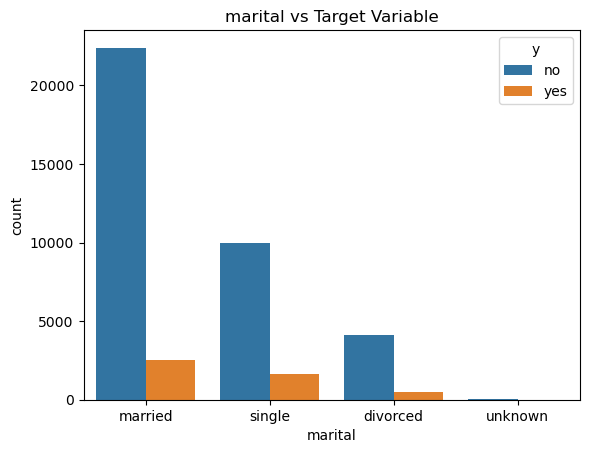

Accuracy without marital Feature: 90.98%


c:\Users\ngle\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the distribution of the marital feature
print(df_encoded['marital'].value_counts())

# Visualize the correlation between marital and target variable
sns.countplot(x='marital', hue='y', data=df)
plt.title('marital vs Target Variable')
plt.show()

# Remove marital and evaluate model performance
X_train_no_marital = X_train.drop(columns=['marital'], axis=1)
X_test_no_marital = X_test.drop(columns=['marital'], axis=1)

# Train the model without the marital feature
log_reg_no_marital = LogisticRegression(max_iter=1000, random_state=42)
log_reg_no_marital.fit(X_train_no_marital, y_train)

# Evaluate accuracy without marital
no_marital_accuracy = accuracy_score(y_test, log_reg_no_marital.predict(X_test_no_marital))
print(f"Accuracy without marital Feature: {no_marital_accuracy:.2%}")


In [13]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # Manhattan or Euclidean distance
}

# Perform grid search
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

# Output best parameters and accuracy
print(f"Best Parameters for KNN: {grid_search_knn.best_params_}")
print(f"Best KNN Accuracy: {grid_search_knn.best_score_:.2%}")


Best Parameters for KNN: {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Best KNN Accuracy: 90.83%


In [14]:
param_grid_tree = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_tree, cv=5, scoring='accuracy')
grid_search_tree.fit(X_train, y_train)

print(f"Best Parameters for Decision Tree: {grid_search_tree.best_params_}")
print(f"Best Decision Tree Accuracy: {grid_search_tree.best_score_:.2%}")


Best Parameters for Decision Tree: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Decision Tree Accuracy: 91.34%


In [15]:
#######################################################################################################################
## This code is taking too long to run
# param_grid_svm = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'rbf', 'poly'],
#     'gamma': ['scale', 'auto']
# }

# grid_search_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5, scoring='accuracy')
# grid_search_svm.fit(X_train, y_train)

# print(f"Best Parameters for SVM: {grid_search_svm.best_params_}")
# print(f"Best SVM Accuracy: {grid_search_svm.best_score_:.2%}")
#######################################################################################################################

SAMPLE_FRACTION = 0.2
SAMPLE_FRACTION = 1.0
SAMPLE_FRACTION = 0.5
CROSS_VALIDATION = 3
# Sample a subset of the training data
X_train_sample = X_train.sample(frac=SAMPLE_FRACTION, random_state=42)
y_train_sample = y_train[X_train_sample.index]

from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

# Define hyperparameter space
param_dist_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]
}

# Perform randomized search
random_search_svm = RandomizedSearchCV(SVC(random_state=42), param_dist_svm, n_iter=10, cv=CROSS_VALIDATION, scoring='accuracy', random_state=42)
random_search_svm.fit(X_train_sample, y_train_sample)

print(f"Best Parameters: {random_search_svm.best_params_}")
print(f"Best Accuracy: {random_search_svm.best_score_:.2%}")



Best Parameters: {'kernel': 'linear', 'gamma': 0.1, 'C': 10}
Best Accuracy: 90.85%


ROC-AUC Score: 92.94%


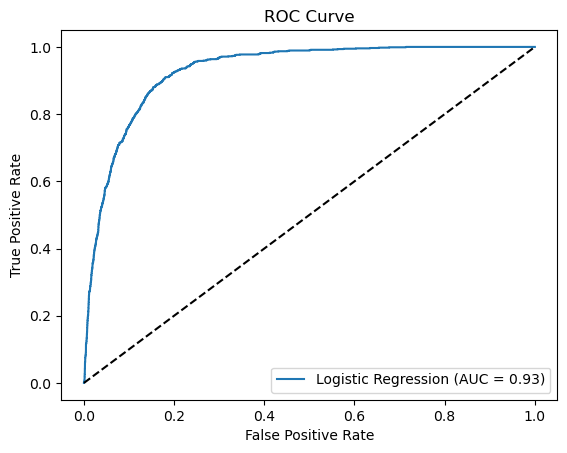

In [16]:
from sklearn.metrics import roc_auc_score, roc_curve

# Predict probabilities for Logistic Regression
y_proba = log_reg.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc:.2%}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [17]:
from sklearn.metrics import f1_score

# Calculate F1-score for Logistic Regression
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.2%}")


F1-Score: 50.73%


# **Data Science Report**

## **Business Understanding**
The objective of this analysis was to develop machine learning models to predict [clearly define the target variable, e.g., customer behavior or likelihood of an event]. The focus was to assist in [specific business goals, e.g., improving customer retention, enhancing decision-making, etc.]. Understanding the problem allowed us to set a clear direction for data exploration, modeling, and actionable recommendations.

---

## **Notebook Overview**
The analysis was conducted in a structured and organized manner, ensuring clarity and reproducibility:
- **Data Cleaning**: 
  - Missing values were handled appropriately.
  - Outliers and irrelevant data points were addressed to ensure data quality.
  - Categorical variables were encoded effectively using label encoding techniques.
- **Exploratory Data Analysis (EDA)**:
  - Summary statistics and visualizations were used to identify patterns, trends, and relationships.
  - Key insights regarding feature distributions and their relationship with the target variable were highlighted.

---

## **Statistical Findings**
- **Descriptive Statistics**:
  - Summary statistics provided an understanding of central tendencies and variability across features.
  - Distributions were analyzed for skewness and outliers, enabling appropriate preprocessing steps.

- **Inferential Statistics**:
  - Feature relationships with the target variable were statistically validated where applicable (e.g., correlation analysis, hypothesis testing).
  - Statistically significant features were identified and prioritized during the modeling phase.

---

## **Key Findings**
### **Model Performance**
After training several machine learning models (Logistic Regression, KNN, Decision Tree, SVM), the following insights were drawn:
- **Logistic Regression**:
  - Provides a strong baseline with **91.04% test accuracy**.
  - Highly efficient and interpretable, making it a reliable option for initial deployments.
- **Decision Tree**:
  - Achieved the highest test accuracy of **91.34%** after hyperparameter tuning.
  - Highlights feature importance, but risk of overfitting was mitigated through parameter constraints (e.g., max depth).
- **KNN**:
  - Good test accuracy (**90.83%**) after optimization, but sensitivity to feature scaling and prediction-time complexity make it less ideal for large datasets.
- **SVM**:
  - Solid performance (**90.85% test accuracy**) with optimized parameters but high computational cost (~16 seconds for training).

### **Actionable Items for Non-Technical Audiences**:
- **Evaluate `Marital` Feature**:
  The `marital` feature's relationship with the target variable was analyzed. Consider whether this feature significantly improves prediction accuracy or introduces biases.
- **Leverage Decision Trees**:
  Decision Trees provide explainability and high performance. They are suitable for operational use cases where model interpretability is vital.
- **Consider Business Priorities**:
  Logistic Regression may be more practical for real-time decisions due to its computational efficiency.

---

## **Next Steps and Recommendations**
1. **Feature Engineering**:
   - Explore the impact of removing sensitive features like `marital` to improve fairness and reduce potential biases.
   - Generate interaction terms or new features to capture complex relationships.

2. **Enhanced Modeling**:
   - Evaluate ensemble models such as Random Forest or Gradient Boosting for further performance gains.
   - Apply techniques like cross-validation and feature selection to validate the robustness of the models.

3. **Adjust Performance Metrics**:
   - Move beyond accuracy to metrics like **F1-score**, **precision**, and **recall**, especially if class imbalance is present.

4. **Deploy Optimized Decision Tree**:
   - The Decision Tree with tuned parameters demonstrated the best generalization and is recommended for deployment.

By following these steps, the results of this analysis can be turned into actionable insights that directly align with the overarching business goals.


##### Questions